# Cellshapy

## Install

To install `cellshapy` in development mode, please run

```
python setup.py develop
```

Then, you can import the package, simply using

```
import cellshapy
```

## Uninstall

Then, to uninstall the package, run

```
python setup.py develop --uninstall
```

## Without installation

To import cellshapy **without** creating a `pip` development package, add the path to the system path like this:

```
import os, sys, glob
folder = os.path.abspath('..') # change '..' to path of root of cellshapy source
if folder not in sys.path:
    sys.path.append(folder)
import cellshapy
```

In [137]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

#import os, sys, glob
#folder = os.path.abspath('..') # change '..' to path of root of cellshapy source
#if folder not in sys.path:
#    sys.path.append(folder)
import cellshapy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load videos

In [138]:
#paths = '/home/debacwa/Work/celldynamics/data_simulated/morphing*.tif'
#paths = '/home/debacwa/Work/celldynamics/data_simulated/Sweep_IntracellPDE_NPF_Factin_45/**/*.tif'
#paths = '/home/debacwa/Work/celldynamics/data_simulated/SweepNPF_47/**/*.tif'

#paths = '/Users/wdeback/Work/celldynamics/data_simulated/morphing*.tif'
#paths = '/Users/wdeback/Work/celldynamics/data_simulated/ellipses/*.tif'
paths = '/Users/wdeback/Work/celldynamics/data_simulated/SweepNPF_47/**/*.tif'
#paths = '/Users/wdeback/Work/celldynamics/data_simulated/Sweep_IntracellPDE_NPF_Factin_45/**/*.tif'

videos = cellshapy.VideoCollection.from_glob(paths, composite=True)

Creating VideoCollection from glob expression /Users/wdeback/Work/celldynamics/data_simulated/SweepNPF_47/**/*.tif: 10 video files or directories
Creating video from tiff file: /Users/wdeback/Work/celldynamics/data_simulated/SweepNPF_47/IntracellPDE_NPF_Factin_2585/p.tif

/Users/wdeback/anaconda/envs/cellshapy/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


Creating video from tiff file: /Users/wdeback/Work/celldynamics/data_simulated/SweepNPF_47/IntracellPDE_NPF_Factin_2594/p.tif

## Show frame 

with contour and measured region-based features 

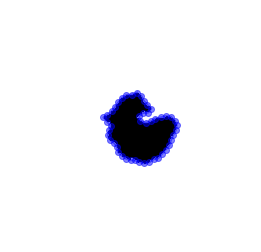

area                bbox bbox_area                        centroid  \
0  2512  (76, 65, 141, 132)      4355  (110.080414013, 96.6508757962)   

  convex_area eccentricity equivalent_diameter euler_number    extent  \
0        2956      0.59253             56.5542            1  0.576808   

  filled_area  ...  asphericity   thinnes perimeter convex hull  \
0        2512  ...      2.05564  0.486465                   260   

  perimeter nbh8 convexity perimeter area convex hull convexity area  \
0            260            0.823772             2956       0.849797   

  max_feret video frame  
0   66.7533     0     5  

[1 rows x 34 columns]

In [145]:
v = 0
f = 5
videos.videos[v].frames[f].show(show_contour=True)

import pandas as pd
pd.DataFrame.from_dict(videos.videos[v].frames[f].features, 
                       orient='index').T

## Show an animation of a video

In [148]:
animation = videos.videos[v].show(duration=4.0, show_image=True)

from IPython.display import HTML
#HTML(animation.to_html5_video())

Progress: [----------------------------------------] 0.0% Time: 0.00664s ETA: 1.33s

# Show animations of a video collection

In [163]:
table_of_animations = videos.show(duration=1.0, 
                                  show_image=True, 
                                  show_contour=False,
                                  figsize=(2,2))

from IPython.display import HTML
#HTML( table_of_animations )

Progress: [****************************************] 100.0% Completed in 15.3s

## Align all contours

iteration 4, error: 0.00005
 2010 contours aligned in 2.9e+01s


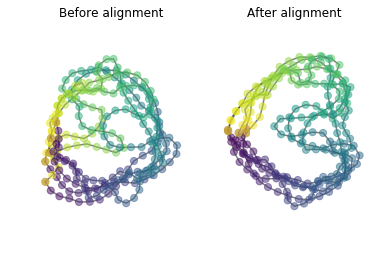

In [150]:
_ = videos.align_contours(show_samples=5)

# Embedding

### Create all embeddings

In [151]:
videos.embed(source='features', method='pca', n_components=2)
videos.embed(source='features', method='tsne', n_components=2)
videos.embed(source='features', method='umap', n_components=2)

videos.embed(source='contours', method='pca', n_components=2)
videos.embed(source='contours', method='tsne', n_components=2)
videos.embed(source='contours', method='umap', n_components=2)

`pca` embedding for `features` done (0.09 s).
`tsne` embedding for `features` using `MulticoreTSNE` done (6.33 s).
`umap` embedding for `features` done (3.53 s).
`pca` embedding for `contours` done (0.01 s).
`tsne` embedding for `contours` using `MulticoreTSNE` done (6.65 s).
`umap` embedding for `contours` done (3.42 s).


`pca` embedding for `features` done (0.09 s).
`tsne` embedding for `features` done (54.65 s).
`umap` embedding for `features` done (3.31 s).
`pca` embedding for `contours` done (0.01 s).
`tsne` embedding for `contours` done (64.18 s).
`umap` embedding for `contours` done (3.21 s).

Example of the dict storing the embedding vectors per frame

In [152]:
videos.videos[v].frames[f].embedding

{('pca', 'features'): array([ 0.74061572,  0.26248983]),
 ('tsne', 'features'): array([-4.96846698, -2.32098816]),
 ('umap', 'features'): array([ 3.56591344,  2.98140073], dtype=float32),
 ('pca', 'contours'): array([ 7.11578667, -4.56700662]),
 ('tsne', 'contours'): array([  5.56273386, -12.35094207]),
 ('umap', 'contours'): array([-2.96800089,  0.8403241 ], dtype=float32)}

# PCA

Progress: [****************************************] 100.0% Completed in 4.53s

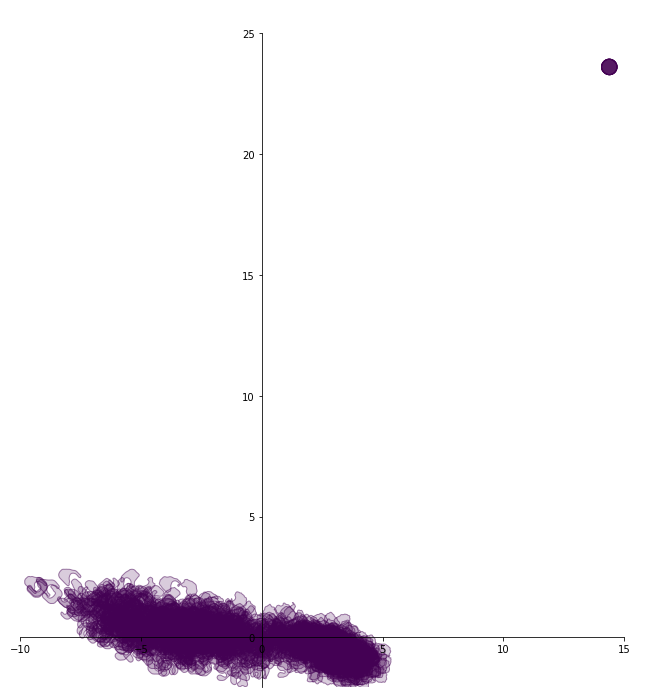

In [153]:
videos.shape_space('features', 'pca', shape_size=4)

Progress: [****************************************] 100.0% Completed in 5.08s

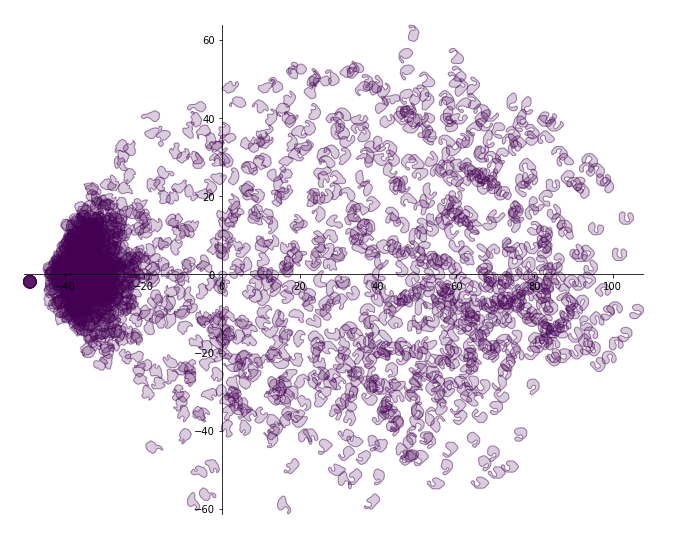

In [154]:
videos.shape_space('contours', 'pca', shape_size=4)

# tSNE

Progress: [****************************************] 100.0% Completed in 4.6s

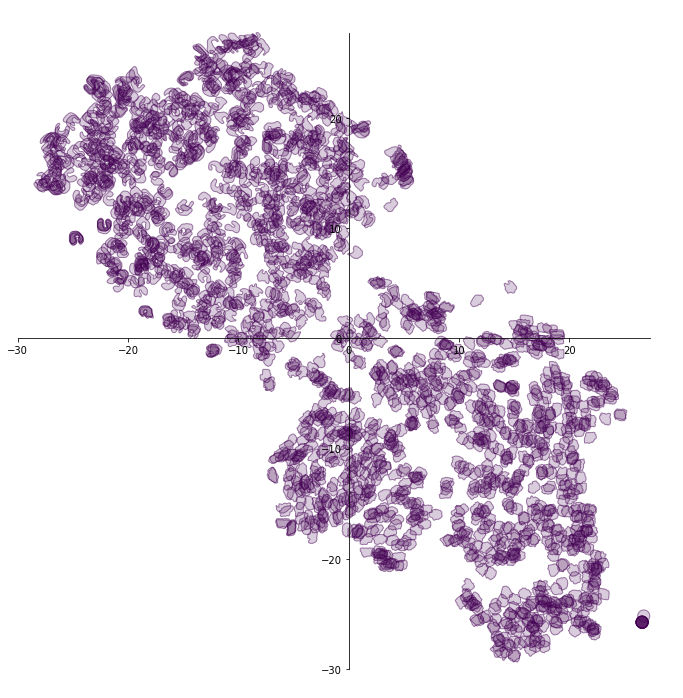

In [155]:
videos.shape_space('features', 'tsne', shape_size=3)

Progress: [****************************************] 100.0% Completed in 4.48s

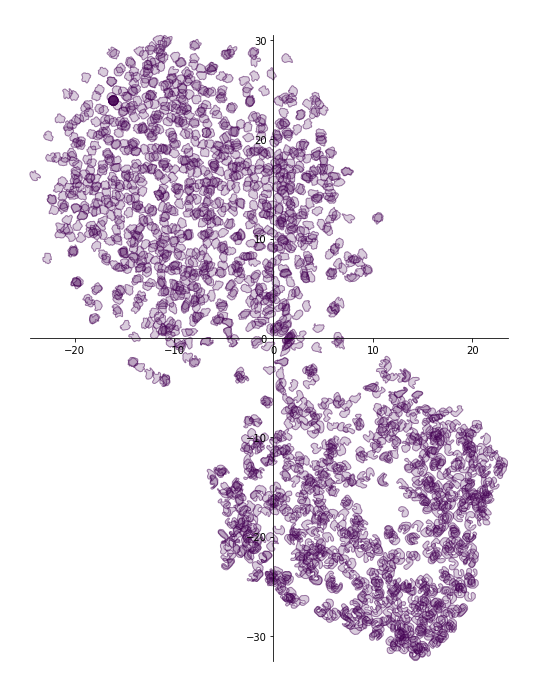

In [156]:
videos.shape_space('contours', 'tsne', shape_size=3)

# UMAP

Progress: [****************************************] 100.0% Completed in 4.41s

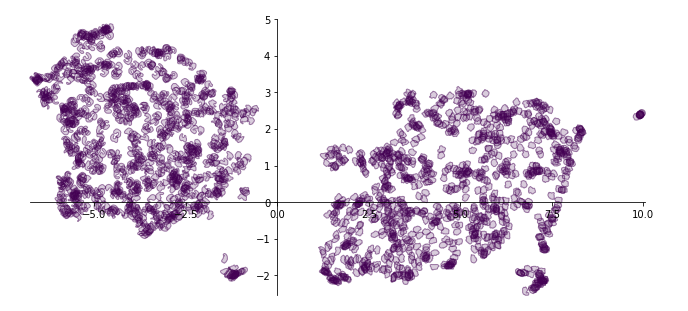

In [157]:
videos.shape_space('features', 'umap', shape_size=4)

Progress: [**************************************--] 95.4% Time: 4.35s ETA: 0.209s

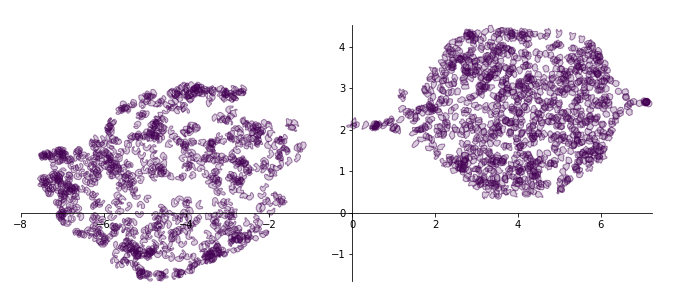

In [158]:
videos.shape_space('contours', 'umap', shape_size=4, 
                   alpha_edge=0.5, alpha_face=0.2)

----

# Tensor decomposition (WIP)

## 1. create tensor


In [159]:
def create_tensor(format='STF'):
    
    
    
    if  format.lower() == 'samples_time_features' or format.lower() == 'stf':
            
        df = videos._all_features()

        # get number of frames
        num_frames = df['frame'].nunique()
        # get number of features, number of columns minus frames and video columns
        num_features = len( df.columns ) - 2
        
        # column-wise standardization (and restore 'video' column)
        df_video = df['video']
        df = (df - df.mean()) / (df.std() + 1e-12)
        df['video'] = df_video
        
        # create tensor with features:
        # - groupby 'video'
        # - drop 'frame' and 'video' column
        # - convert dataframe to array
        # - convert list of arrays to array
        import numpy as np
        tensor = np.array([df_video.drop(['frame', 'video'], axis=1).values for i, df_video in df.groupby('video')])
        
        return tensor

## 2. parafac

In [160]:
def tensor_decomposition( tensor_np, rank=2):
    from tensorly.decomposition import parafac, tucker
    tensor_tl = tl.tensor( tensor_np )
    factors = parafac(tensor_tl, rank=rank)
    return factors

    

In [161]:
tensor = create_tensor()
factors = tensor_decomposition( tensor )

## 3. visualize animation

(-48.120417650207777,
 50.976212808227444,
 22.996520517188795,
 23.412118762776359)

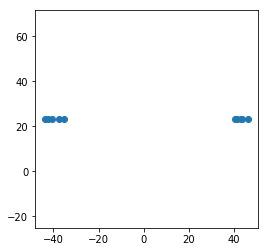

In [169]:
%matplotlib inline 
import matplotlib.pylab as plt 
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(factors[0][:,0], factors[0][:,1])
ax.axis('equal')

In [170]:
factors[0].shape


(10, 2)

In [174]:
%matplotlib inline 
import matplotlib.pylab as plt 
fig, ax = plt.subplots(1,1,figsize=(4,4))


for v in videos.videos:
    v.show(show_image=False, 
           show_contour=True,
           cmap='gray_r', 
           ax=ax, 
           figsize=(4,4),
           verbose=True)
    
    plt.show()
    

Progress: [----------------------------------------] 0.0% Time: 0.00192s ETA: 0.384s